In [6]:
from  yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeansimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

from sklearn.metrics import silhouette_samples, silhouette_score
import squarify

In [7]:
path = r'D:\Ky6_2022\PHANTICHDULIEU\212IS2902_DAwP_FinalProject_Group8\DataTransaction_Jan2021_to_Mar2022.xlsx'
df = pd.read_excel(path)

In [8]:
df.shape

(52760, 7)

In [9]:
df.dtypes

DATE                    datetime64[ns]
Order_id                         int64
NEWVERTICAL_Merchant            object
MerchantID                       int64
User_id                          int64
GMV                              int64
Service Group                   object
dtype: object

In [10]:
df.head()

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace
1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket
2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket
3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket
4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52760 entries, 0 to 52759
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  52760 non-null  datetime64[ns]
 1   Order_id              52760 non-null  int64         
 2   NEWVERTICAL_Merchant  52760 non-null  object        
 3   MerchantID            52760 non-null  int64         
 4   User_id               52760 non-null  int64         
 5   GMV                   52760 non-null  int64         
 6   Service Group         52760 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.8+ MB


In [12]:
df.isnull().sum()

DATE                    0
Order_id                0
NEWVERTICAL_Merchant    0
MerchantID              0
User_id                 0
GMV                     0
Service Group           0
dtype: int64

In [13]:
df.DATE.max()

Timestamp('2022-03-31 00:00:00')

<AxesSubplot:>

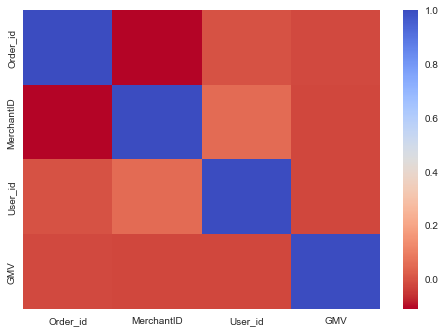

In [14]:
corrDf = df.corr()
sns.heatmap(corrDf, 
        xticklabels=corrDf.columns,
        yticklabels=corrDf.columns, cmap='coolwarm_r')

In [15]:
(df.GMV <0).sum()

0

In [16]:
df.duplicated().sum()

3585

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(49175, 7)

In [19]:
df[['DATE','Order_id','User_id','GMV','Service Group','NEWVERTICAL_Merchant']].nunique()

DATE                      454
Order_id                49175
User_id                  6479
GMV                      9698
Service Group               6
NEWVERTICAL_Merchant       12
dtype: int64

In [20]:
df = df[['DATE','Order_id','User_id','GMV']]

In [21]:
df.describe(datetime_is_numeric=True)

,DATE,Order_id,User_id,GMV
count,49175,4.917500e+04,4.917500e+04,4.917500e+04
mean,2021-11-15 20:10:48.036603648,1.823368e+10,4.114886e+07,1.435014e+05
min,2021-01-01 00:00:00,8.725567e+09,1.081010e+05,1.000000e+03
25%,2021-09-11 00:00:00,1.647234e+10,3.628736e+07,1.500000e+04
50%,2021-12-07 00:00:00,1.894498e+10,4.407502e+07,4.000000e+04
75%,2022-01-31 00:00:00,2.038546e+10,5.068920e+07,1.234000e+05
max,2022-03-31 00:00:00,2.255931e+10,6.149055e+07,2.000000e+07
std,NaN,3.017890e+09,1.395196e+07,3.806613e+05


In [22]:
print(df.var())

Order_id    9.107663e+18
User_id     1.946571e+14
GMV         1.449031e+11
dtype: float64


C:\Users\truon\AppData\Local\Temp/ipykernel_14436/1942798189.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.var())


In [23]:
df.skew()

C:\Users\truon\AppData\Local\Temp/ipykernel_14436/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Order_id    -0.831500
User_id     -1.175935
GMV         10.915268
dtype: float64

In [24]:
df.kurtosis()

C:\Users\truon\AppData\Local\Temp/ipykernel_14436/615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Order_id      0.200620
User_id       0.947497
GMV         255.202516
dtype: float64

In [25]:
df

,DATE,Order_id,User_id,GMV
0,2021-01-01,8733622706,61386143,100000
1,2021-01-01,8726857991,48453125,5000
2,2021-01-01,8737326894,49921027,106600
3,2021-01-01,8732579078,46022523,270000
4,2021-01-01,8725567343,44014594,68000
...,...,...,...,...
52755,2022-03-31,22531432792,53272777,30000
52756,2022-03-31,22516959788,41605249,10000
52757,2022-03-31,22518046622,29029358,42000
52758,2022-03-31,22518047037,29029358,5000


c:\Users\truon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\truon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\truon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='DATE', ylabel='Density'>

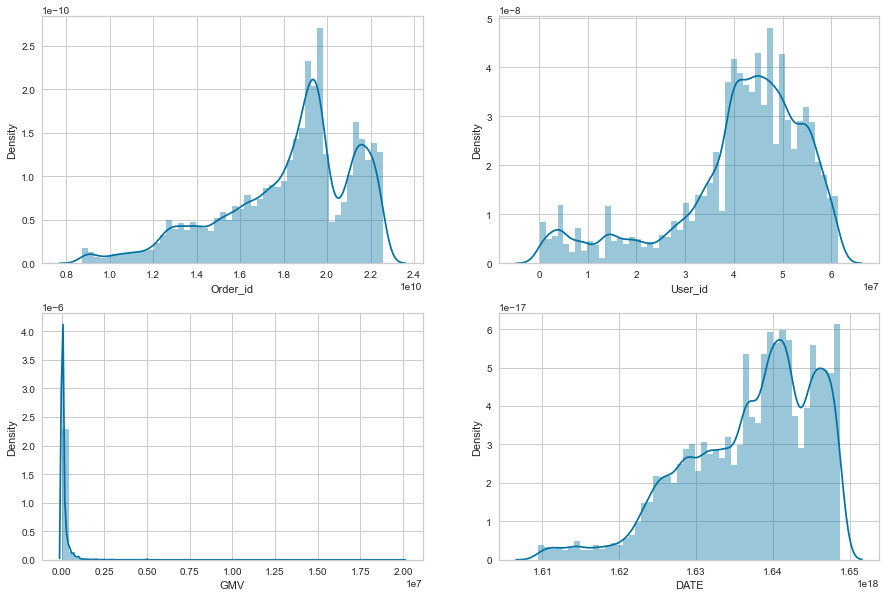

In [26]:
fig, axs  = plt.subplots(nrows= 2,ncols=2, figsize = (15,10))
sns.distplot ( a= df['Order_id'] ,  ax=axs[0,0])
sns.distplot ( a = df['User_id'] ,ax=axs[0,1])
sns.distplot ( a = df['GMV'],ax = axs[1,0])
sns.distplot ( a = df['DATE'],ax = axs[1,1])


<AxesSubplot:xlabel='GMV'>

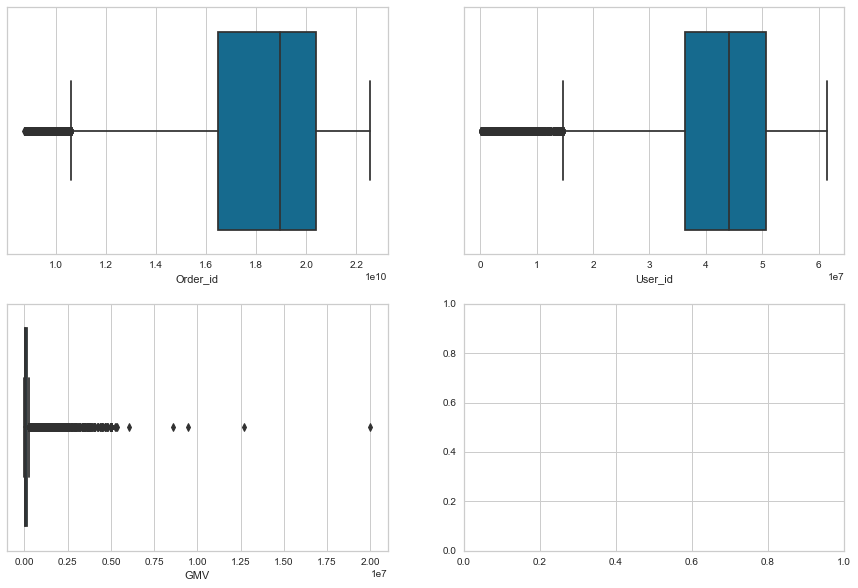

In [27]:
fig, axs  = plt.subplots(nrows= 2,ncols=2, figsize = (15,10))
sns.boxplot ( x= df['Order_id'] ,  ax=axs[0,0])
sns.boxplot ( x = df['User_id'] ,ax=axs[0,1])
sns.boxplot ( x = df['GMV'],ax = axs[1,0])


<AxesSubplot:xlabel='DATE', ylabel='GMV'>

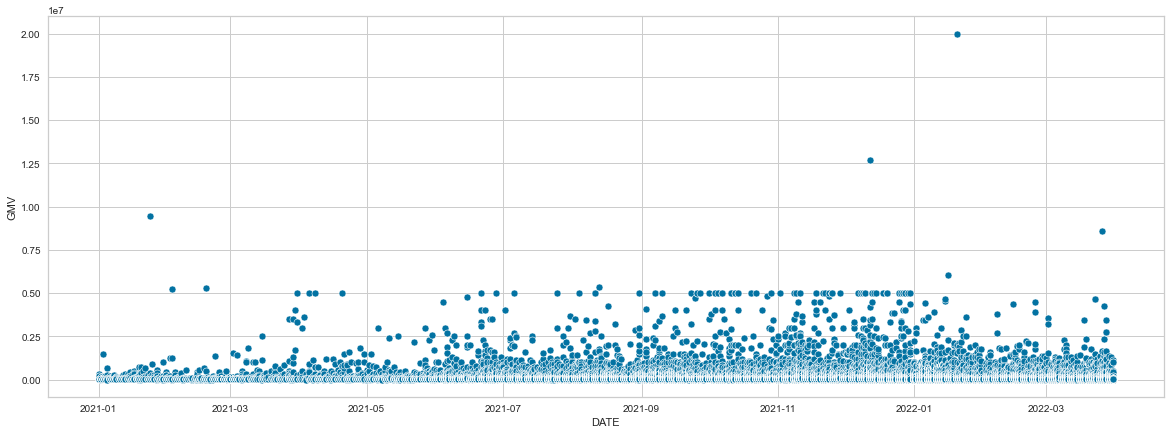

In [28]:
plt.figure(1 , figsize = (20 , 7))
sns.scatterplot(x = 'DATE' , y = 'GMV' , data = df)

In [29]:
df.DATE.max()

Timestamp('2022-03-31 00:00:00')

In [30]:
pin_date = dt.datetime(2022, 4,30)

In [31]:
df1 = pd.pivot_table(data = df, 
               index = ['User_id'],
               values = ['DATE'],
               aggfunc = {'DATE':max}
              )

df1.columns = ['RecentOrderDate']

In [32]:
customer = pd.DataFrame({'User_id': df['User_id'].unique()})
df2 = pd.merge(customer, df1.reset_index(), on = ['User_id'])
df2['Recency'] = df2['RecentOrderDate'].apply(lambda x: (pin_date - x).days)

In [33]:
dfFrequency = df.groupby('User_id').Order_id.nunique().to_frame()
dfFrequency.columns = ['Frequency']

In [34]:
df2 = pd.merge(df2, dfFrequency.reset_index(), on = 'User_id')

In [35]:
dfMonetary = df.groupby('User_id').GMV.sum().to_frame()
dfMonetary.columns = ['Monetary']
df2 = pd.merge(df2, dfMonetary.reset_index(), on = 'User_id')


In [36]:
df2 = df2[['User_id','Recency','Frequency','Monetary']]
df2.head()

,User_id,Recency,Frequency,Monetary
0,61386143,66,6,339100
1,48453125,30,27,3180097
2,49921027,336,2,119600
3,46022523,48,63,10805283
4,44014594,438,4,150000


In [37]:
df2['Re_zs'] = stats.zscore(df2['Recency'])
df2['Fe_zs'] = stats.zscore(df2['Frequency'])
df2['Mo_zs'] = stats.zscore(df2['Monetary'])
df2.set_index('User_id', inplace=True)

In [38]:
df2.head()

,Recency,Frequency,Monetary,Re_zs,Fe_zs,Mo_zs
User_id,,,,,,
61386143,66,6,339100,-0.713776,-0.090166,-0.154905
48453125,30,27,3180097,-1.048483,1.100775,0.431826
49921027,336,2,119600,1.796531,-0.317012,-0.200237
46022523,48,63,10805283,-0.881129,3.142389,2.006602
44014594,438,4,150000,2.744869,-0.203589,-0.193959


In [39]:
#Remove outlier
outlier=df2[((df2[['Re_zs','Fe_zs','Mo_zs']] < -3) | (df2[['Re_zs','Fe_zs','Mo_zs']] >3)).any(axis=1)]
outlier.head()


,Recency,Frequency,Monetary,Re_zs,Fe_zs,Mo_zs
User_id,,,,,,
46022523,48,63,10805283,-0.881129,3.142389,2.006602
59720332,484,1,10000,3.172551,-0.373723,-0.222872
11368352,468,2,8000,3.023792,-0.317012,-0.223285
7367023,473,3,637000,3.070279,-0.260300,-0.093382
61488523,480,4,280000,3.135361,-0.203589,-0.167111


In [40]:
df2 = df2[((df2[['Re_zs','Fe_zs','Mo_zs']] >= -3) & (df2[['Re_zs','Fe_zs','Mo_zs']] <= 3)).all(axis=1)]
df2.head()


,Recency,Frequency,Monetary,Re_zs,Fe_zs,Mo_zs
User_id,,,,,,
61386143,66,6,339100,-0.713776,-0.090166,-0.154905
48453125,30,27,3180097,-1.048483,1.100775,0.431826
49921027,336,2,119600,1.796531,-0.317012,-0.200237
44014594,438,4,150000,2.744869,-0.203589,-0.193959
31058664,96,9,1229224,-0.434853,0.079969,0.028926


In [41]:
df2.shape

(6317, 6)

In [42]:
df2["Recency_score"] = pd.qcut(df2['Recency'], 5, labels=[5,4,3, 2, 1])
df2["Frequency_score"] = pd.qcut(df2['Frequency'].rank(method="first"), 5, labels=[1, 2, 3,4,5])
df2["Monetary_score"] = pd.qcut(df2['Monetary'], 5, labels=[1, 2, 3,4,5])
df2['rfm'] = df2['Recency_score'].astype(str) + df2['Frequency_score'].astype(str) + df2['Monetary_score'].astype(str)
df2['Score']=(df2['Recency_score'].astype(int)+df2['Frequency_score'].astype(int)+df2['Monetary_score'].astype(int))


In [43]:
df2.head()

,Recency,Frequency,Monetary,Re_zs,Fe_zs,Mo_zs,Recency_score,Frequency_score,Monetary_score,rfm,Score
User_id,,,,,,,,,,,
61386143,66,6,339100,-0.713776,-0.090166,-0.154905,4,4,4,444,12
48453125,30,27,3180097,-1.048483,1.100775,0.431826,5,5,5,555,15
49921027,336,2,119600,1.796531,-0.317012,-0.200237,1,2,3,123,6
44014594,438,4,150000,2.744869,-0.203589,-0.193959,1,3,3,133,7
31058664,96,9,1229224,-0.434853,0.079969,0.028926,3,4,5,345,12


In [44]:
df2[df2['Score']== 15].sort_values('Monetary', ascending=False)

,Recency,Frequency,Monetary,Re_zs,Fe_zs,Mo_zs,Recency_score,Frequency_score,Monetary_score,rfm,Score
User_id,,,,,,,,,,,
46740171,41,28,15231000,-0.946211,1.157487,2.920614,5,5,5,555,15
2735892,38,12,14977046,-0.974104,0.250103,2.868166,5,5,5,555,15
37102490,37,44,14828882,-0.983401,2.064871,2.837567,5,5,5,555,15
34367853,37,23,14655677,-0.983401,0.873929,2.801796,5,5,5,555,15
45908482,35,58,14560578,-1.001996,2.858832,2.782156,5,5,5,555,15
...,...,...,...,...,...,...,...,...,...,...,...
60271061,45,45,856000,-0.909022,2.121582,-0.048153,5,5,5,555,15
50552589,35,16,856000,-1.001996,0.476949,-0.048153,5,5,5,555,15
33571564,30,12,852967,-1.048483,0.250103,-0.048780,5,5,5,555,15


In [45]:
df2[df2['Score']==15].count()

Recency            369
Frequency          369
Monetary           369
Re_zs              369
Fe_zs              369
Mo_zs              369
Recency_score      369
Frequency_score    369
Monetary_score     369
rfm                369
Score              369
dtype: int64

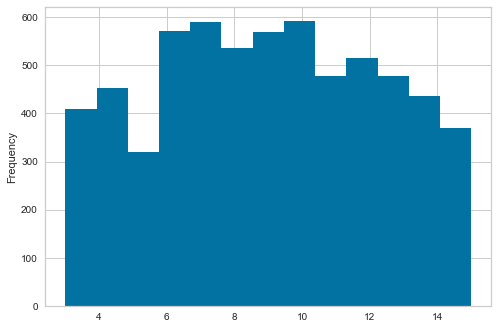

In [46]:
df2['Score'].plot.hist(bins=13)
plt.show()

In [47]:
def rfm_level(score):
    if score <= 6 :
        return 'Bronze'
    elif ((score >6) and (score <= 10)):
        return 'Sliver'
    else:
        return 'Gold'

In [48]:
df2['level'] = df2['Score'].apply(lambda score : rfm_level(score))
df2.head()

,Recency,Frequency,Monetary,Re_zs,Fe_zs,Mo_zs,Recency_score,Frequency_score,Monetary_score,rfm,Score,level
User_id,,,,,,,,,,,,
61386143,66,6,339100,-0.713776,-0.090166,-0.154905,4,4,4,444,12,Gold
48453125,30,27,3180097,-1.048483,1.100775,0.431826,5,5,5,555,15,Gold
49921027,336,2,119600,1.796531,-0.317012,-0.200237,1,2,3,123,6,Bronze
44014594,438,4,150000,2.744869,-0.203589,-0.193959,1,3,3,133,7,Sliver
31058664,96,9,1229224,-0.434853,0.079969,0.028926,3,4,5,345,12,Gold


In [49]:
df2.rfm = df2.rfm.astype(int)

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6317 entries, 61386143 to 48377360
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          6317 non-null   int64   
 1   Frequency        6317 non-null   int64   
 2   Monetary         6317 non-null   int64   
 3   Re_zs            6317 non-null   float64 
 4   Fe_zs            6317 non-null   float64 
 5   Mo_zs            6317 non-null   float64 
 6   Recency_score    6317 non-null   category
 7   Frequency_score  6317 non-null   category
 8   Monetary_score   6317 non-null   category
 9   rfm              6317 non-null   int32   
 10  Score            6317 non-null   int32   
 11  level            6317 non-null   object  
dtypes: category(3), float64(3), int32(2), int64(3), object(1)
memory usage: 463.3+ KB


In [51]:
def label_rfm_segments(rfm):

    if (rfm >= 111) & (rfm <= 155):
        return 'Risky'

    elif (rfm >= 211) & (rfm <= 255):
        return 'Hold and improve'    

    elif (rfm >= 311) & (rfm <= 353):
        return 'Potential loyal'       

    elif ((rfm >= 354) & (rfm <= 454)) or ((rfm >= 511) & (rfm <= 535)) or (rfm == 541):
        return 'Loyal'      

    elif (rfm == 455) or (rfm >= 542) & (rfm <= 555):
        return 'Star'      

    else:
        return 'Other'

In [52]:
df2['rfm_segment_name'] = df2.apply(lambda x: label_rfm_segments(x.rfm), axis=1)
df2.head()

,Recency,Frequency,Monetary,Re_zs,Fe_zs,Mo_zs,Recency_score,Frequency_score,Monetary_score,rfm,Score,level,rfm_segment_name
User_id,,,,,,,,,,,,,
61386143,66,6,339100,-0.713776,-0.090166,-0.154905,4,4,4,444,12,Gold,Loyal
48453125,30,27,3180097,-1.048483,1.100775,0.431826,5,5,5,555,15,Gold,Star
49921027,336,2,119600,1.796531,-0.317012,-0.200237,1,2,3,123,6,Bronze,Risky
44014594,438,4,150000,2.744869,-0.203589,-0.193959,1,3,3,133,7,Sliver,Risky
31058664,96,9,1229224,-0.434853,0.079969,0.028926,3,4,5,345,12,Gold,Potential loyal


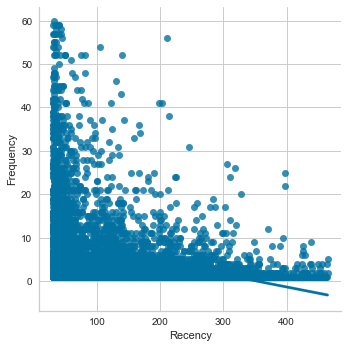

In [53]:
sns.lmplot(x='Recency',y='Frequency',data=df2)
plt.show()

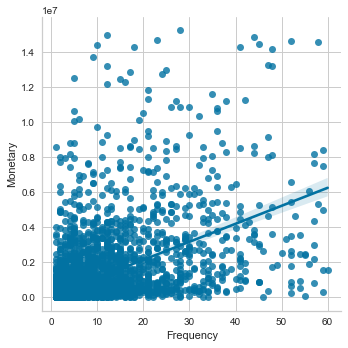

In [54]:
sns.lmplot(x='Frequency',y='Monetary',data=df2)
plt.show()

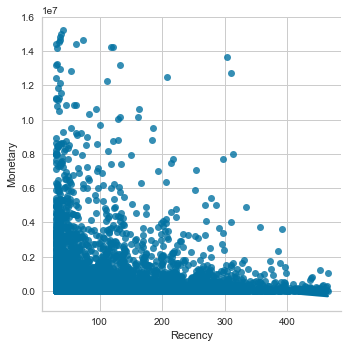

In [55]:
sns.lmplot(x='Recency',y='Monetary',data=df2)
plt.show()

c:\Users\truon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rfm_segment_name', ylabel='count'>

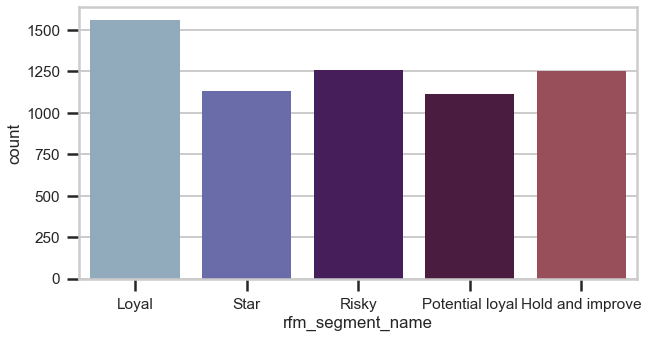

In [56]:
#plot
plt.figure(figsize=(10,5))
sns.set_context("poster", font_scale=0.7)
sns.set_palette('twilight')
sns.countplot(df2['rfm_segment_name'])

In [57]:
df2.groupby('rfm_segment_name').agg({
    'Recency' : ['mean', 'min','max'],
    'Frequency' : ['mean', 'min','max'],
    'Monetary' : ['mean','min','max','count']
})

Recency            Frequency              Monetary  \
                        mean  min  max       mean min max          mean   
rfm_segment_name                                                          
Hold and improve  188.549442  141  243   3.411483   1  56  4.595315e+05   
Loyal              61.579116   30  140   5.256246   1  54  5.700453e+05   
Potential loyal   114.839173   83  140   3.194969   1  32  3.662626e+05   
Risky             313.379365  244  465   2.200000   1  31  2.580220e+05   
Star               39.257750   30   82  16.976971   4  60  2.035796e+06   

                                         
                    min       max count  
rfm_segment_name                         
Hold and improve   1000  12500000  1254  
Loyal              1000  14256000  1561  
Potential loyal    1000  10182621  1113  
Risky              1000  13676486  1260  
Star              12000  15231000  1129

In [58]:
df2.reset_index().groupby('rfm_segment_name').agg(
    customers=('User_id','count'),
    min_rfm=('rfm', 'min'),
    max_rfm=('rfm', 'max'),
).reset_index().sort_values(by='min_rfm')


,rfm_segment_name,customers,min_rfm,max_rfm
3,Risky,1260,111,155
0,Hold and improve,1254,211,255
2,Potential loyal,1113,311,353
1,Loyal,1561,354,541
4,Star,1129,455,555


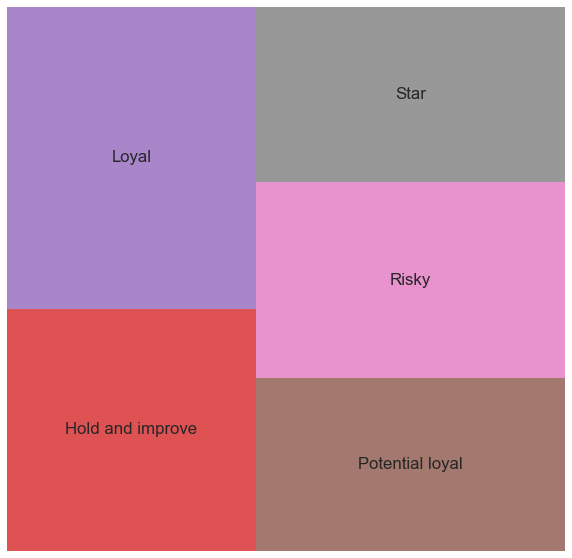

In [59]:
#treemap
df_treemap = df2.reset_index().groupby('rfm_segment_name').agg(
    customers=('User_id', 'count')
).reset_index()
fig, ax = plt.subplots(1, figsize = (10,10))

squarify.plot(sizes=df_treemap['customers'], 
              label=df_treemap['rfm_segment_name'], 
              alpha=.8,
              color=['tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
             )
plt.axis('off')
plt.show()

In [60]:
#df2.groupby('level').agg({
#    'Recency' : ['mean', 'min','max'],
#    'Frequency' : ['mean', 'min','max'],
#    'Monetary' : ['mean','min','max','count']
#})

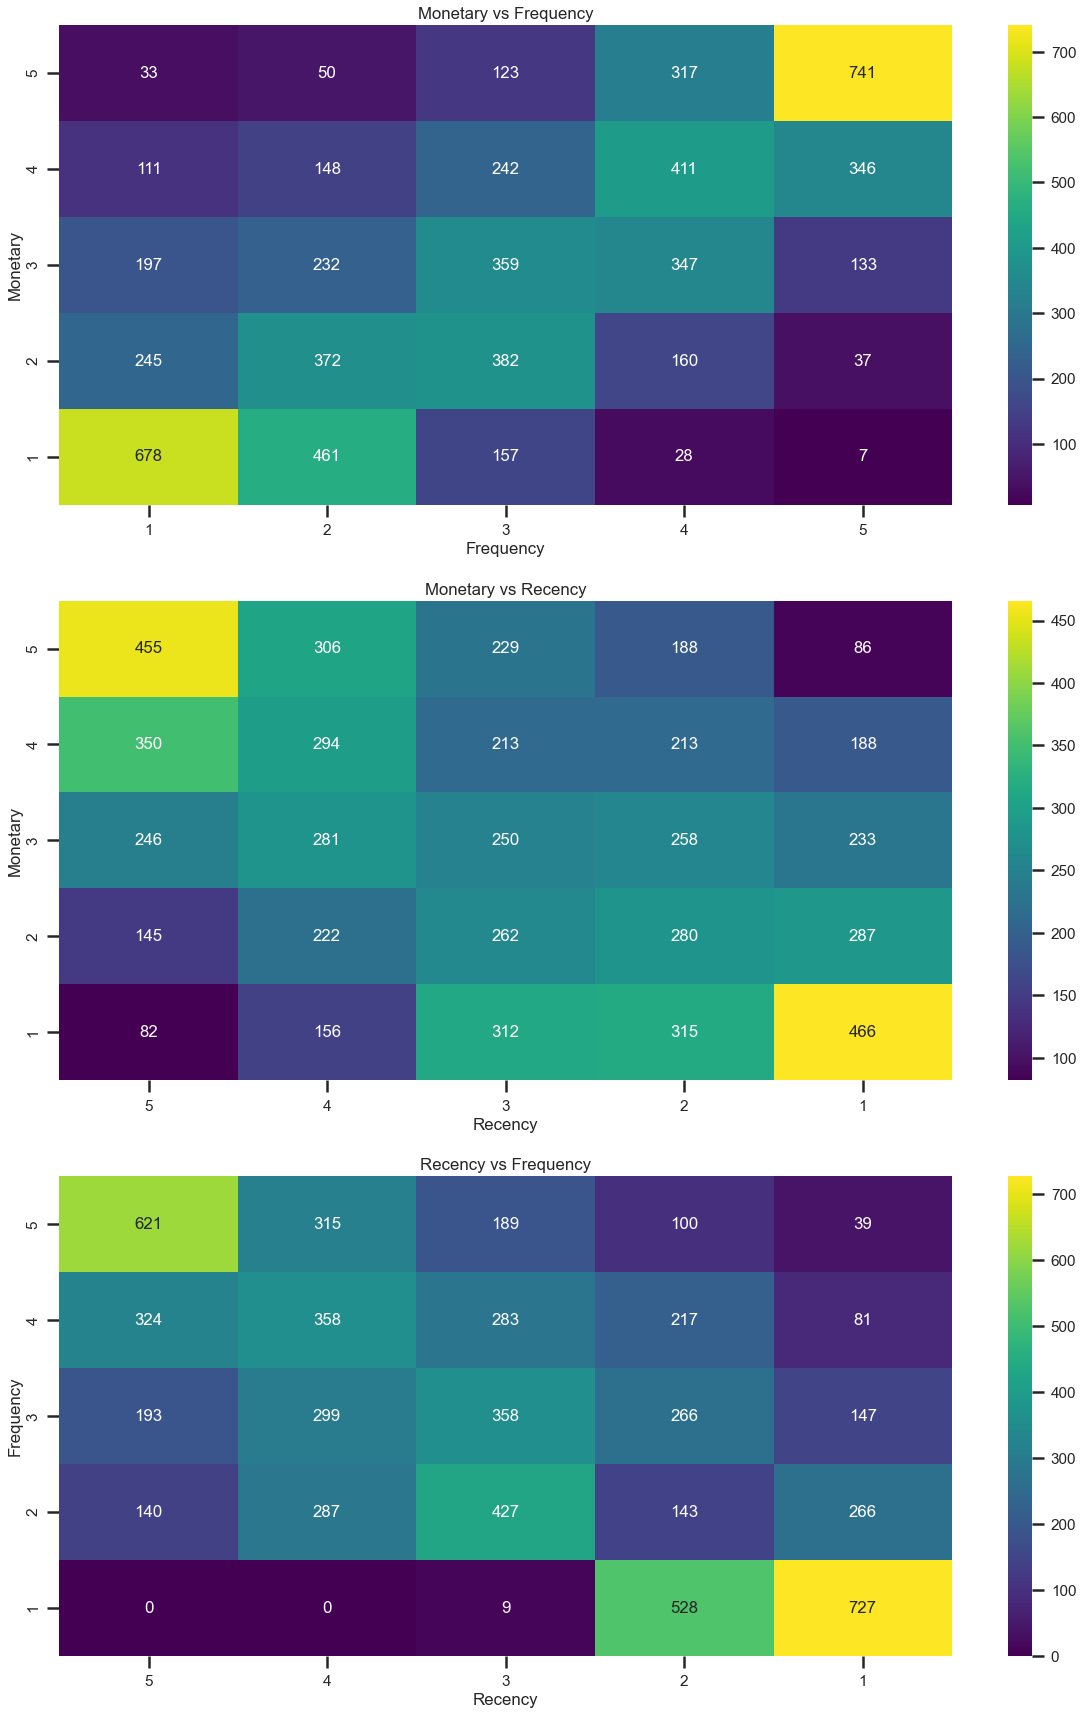

In [61]:
cross_table1 = pd.crosstab(index=df2['Monetary_score'], columns=df2['Frequency_score'])
cross_table2 = pd.crosstab(index=df2['Monetary_score'], columns=df2['Recency_score'])
cross_table3 = pd.crosstab(index=df2['Frequency_score'], columns=df2['Recency_score'])
plt.figure(figsize=(20,30))
plt.subplot(311)
ax1 = sns.heatmap(cross_table1, cmap='viridis', annot=True, fmt=".0f")
ax1.invert_yaxis()
ax1.set_ylabel('Monetary')
ax1.set_xlabel('Frequency')
ax1.set_title('Monetary vs Frequency')
plt.subplot(312)
ax2 = sns.heatmap(cross_table2, cmap='viridis', annot=True, fmt=".0f")
ax2.invert_yaxis()
ax2.set_ylabel('Monetary')
ax2.set_xlabel('Recency')
ax2.set_title('Monetary vs Recency')
plt.subplot(313)
ax3 = sns.heatmap(cross_table3, cmap='viridis', annot=True, fmt=".0f")
ax3.invert_yaxis()
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Recency')
ax3.set_title('Recency vs Frequency')
plt.show()

In [62]:
df3 = df2[['Re_zs','Fe_zs','Mo_zs']]
df3.head()

,Re_zs,Fe_zs,Mo_zs
User_id,,,
61386143,-0.713776,-0.090166,-0.154905
48453125,-1.048483,1.100775,0.431826
49921027,1.796531,-0.317012,-0.200237
44014594,2.744869,-0.203589,-0.193959
31058664,-0.434853,0.079969,0.028926


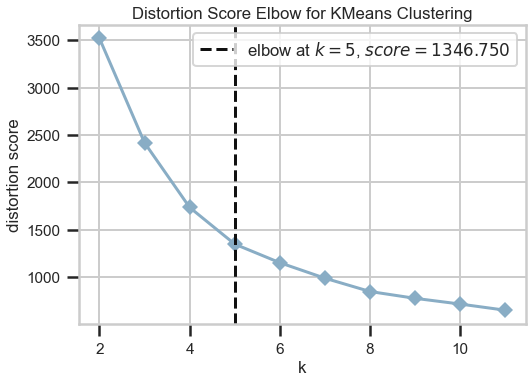

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
visualizer.fit(df3)  
visualizer.show() 

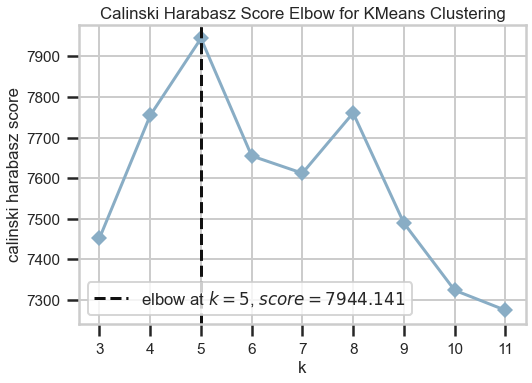

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [64]:
visualizer = KElbowVisualizer(
model, k=(3,12), metric='calinski_harabasz', timings=False, locate_elbow=True)
visualizer.fit(df3)
visualizer.show()

In [65]:
range_n_clusters = [3, 4, 5, 6,7,8,9]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3)
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =",n_clusters,
        "The average silhouette_score is :",silhouette_avg)   

For n_clusters = 3 The average silhouette_score is : 0.533503933727548
For n_clusters = 4 The average silhouette_score is : 0.4570706473235913
For n_clusters = 5 The average silhouette_score is : 0.4506194716101463
For n_clusters = 6 The average silhouette_score is : 0.444016975727476
For n_clusters = 7 The average silhouette_score is : 0.4463301867491736
For n_clusters = 8 The average silhouette_score is : 0.4292828963180076
For n_clusters = 9 The average silhouette_score is : 0.403676548757107


In [66]:
model = KMeans(n_clusters = 5, init = "k-means++",
max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = model.fit_predict(df3)
labels3 = model.labels_
centroids3 = model.cluster_centers_

In [67]:
print(y_kmeans)
print(" Our cluster centers are as follows")
print(centroids3)

[0 3 4 ... 0 0 0]
 Our cluster centers are as follows
[[-0.83229391 -0.09539448 -0.10727875]
 [ 1.043932   -0.28694395 -0.15288658]
 [-0.04276801 -0.23210819 -0.12938576]
 [-0.84166064  1.28124341  0.59067421]
 [ 2.23103533 -0.3271202  -0.19048709]]


In [68]:
clusters = df3.copy()
clusters['cluster']=model.fit_predict(df3)
clusters.groupby(['cluster']).count()

,Re_zs,Fe_zs,Mo_zs
cluster,,,
0,2331,2331,2331
1,1359,1359,1359
2,1733,1733,1733
3,461,461,461
4,433,433,433


c:\Users\truon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

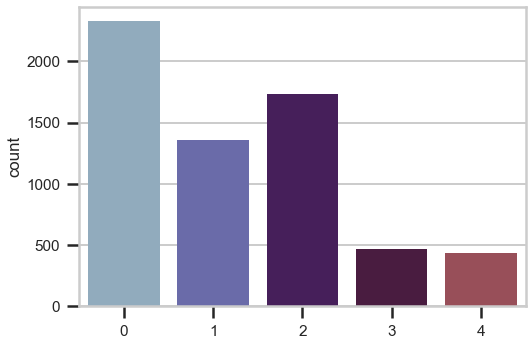

In [69]:
sns.countplot(y_kmeans)

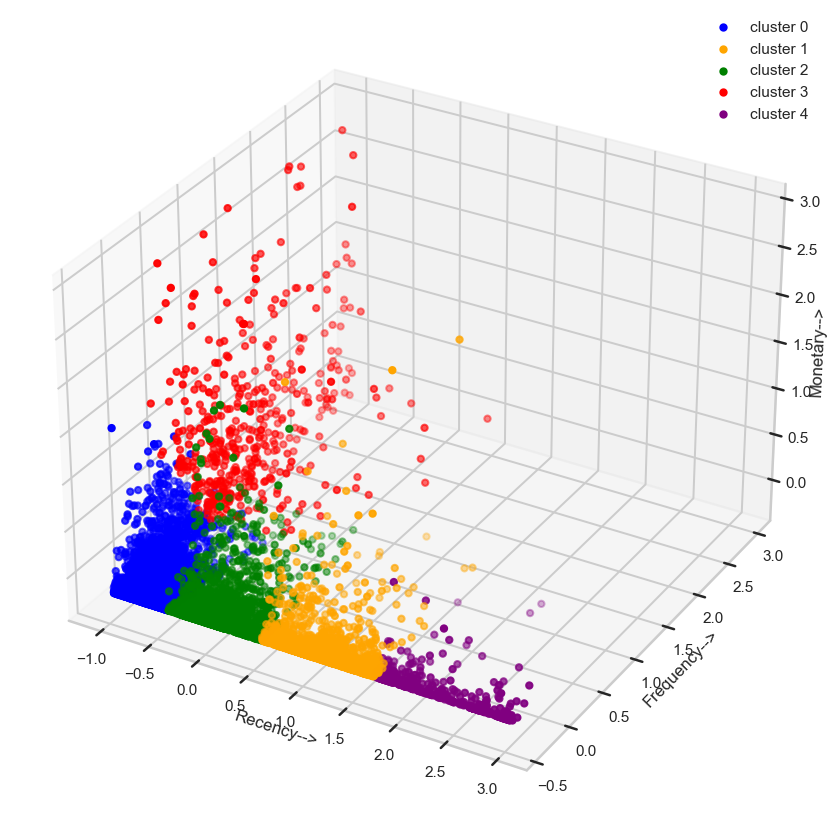

In [70]:
x=df3.values
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],x[y_kmeans == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],x[y_kmeans == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],x[y_kmeans == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1],x[y_kmeans == 3,2], s = 40 , color = 'red', label = "cluster 3")
ax.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1],x[y_kmeans == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Recency-->')
ax.set_ylabel('Frequency-->')
ax.set_zlabel('Monetary-->')
ax.legend()
plt.show()


Silhouette Score: 0.452


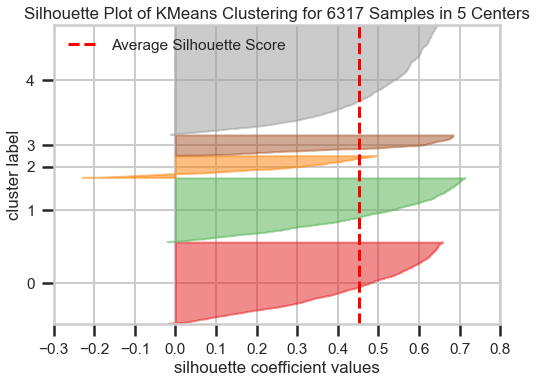

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 6317 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [71]:
#validation
sil_score = silhouette_score(df3, labels3, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df3)   
visualizer.poof()

In [72]:
df2['cluster']= clusters['cluster']
df2.groupby('cluster').agg({
    'Recency' : ['mean','min','max'],
    'Frequency' : ['mean','min','max'],
    'Monetary' : ['mean','min','max','count']})

Recency            Frequency              Monetary         \
               mean  min  max       mean min max          mean    min   
cluster                                                                 
0         53.233376   30  107   5.907336   1  22  5.698448e+05   1000   
1        254.918322  196  320   2.526858   1  31  3.478350e+05   1000   
2        138.081362   92  200   3.502020   1  25  4.629538e+05   1000   
3         52.245119   30  214  30.182213  10  60  3.949253e+06  27000   
4        382.588915  319  465   1.826790   1  25  1.693870e+05   1000   

                         
              max count  
cluster                  
0         8572500  2331  
1        13676486  1359  
2        10600000  1733  
3        15231000   461  
4         4900000   433

In [73]:
df2.groupby(['cluster','rfm_segment_name']).size()

cluster  rfm_segment_name
0        Loyal               1425
         Potential loyal      164
         Star                 742
1        Hold and improve     532
         Risky                827
2        Hold and improve     710
         Loyal                 79
         Potential loyal      944
3        Hold and improve      12
         Loyal                 57
         Potential loyal        5
         Star                 387
4        Risky                433
dtype: int64

In [74]:
#compare
df4 = df2[['Re_zs', 'Fe_zs', 'Mo_zs','rfm_segment_name', 'cluster']].reset_index()
rfm_melted = pd.melt(frame= df4, id_vars= ['User_id','rfm_segment_name', 'cluster'],
var_name = 'metrics', value_name = 'value')
rfm_melted.head()

,User_id,rfm_segment_name,cluster,metrics,value
0,61386143,Loyal,0,Re_zs,-0.713776
1,48453125,Star,3,Re_zs,-1.048483
2,49921027,Risky,4,Re_zs,1.796531
3,44014594,Risky,4,Re_zs,2.744869
4,31058664,Potential loyal,0,Re_zs,-0.434853


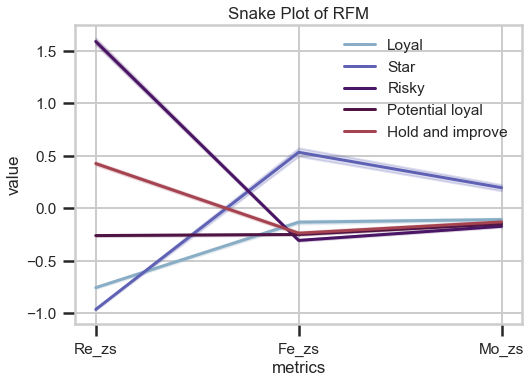

In [75]:
sns.lineplot(x = 'metrics', y = 'value', hue = 'rfm_segment_name', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')
plt.show()

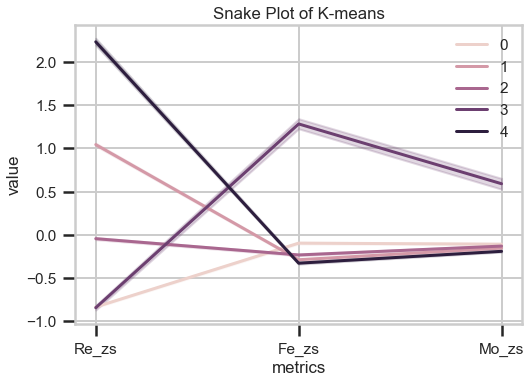

In [76]:
sns.lineplot(x = 'metrics', y = 'value', hue = 'cluster', data = rfm_melted)
plt.title('Snake Plot of K-means')
plt.legend(loc = 'upper right')
plt.show()

In [77]:
df3

,Re_zs,Fe_zs,Mo_zs
User_id,,,
61386143,-0.713776,-0.090166,-0.154905
48453125,-1.048483,1.100775,0.431826
49921027,1.796531,-0.317012,-0.200237
44014594,2.744869,-0.203589,-0.193959
31058664,-0.434853,0.079969,0.028926
...,...,...,...
54557452,-1.048483,-0.373723,-0.222459
50933437,-1.048483,-0.373723,-0.163889
40082317,-1.048483,-0.373723,-0.207300


In [78]:
df2

,Recency,Frequency,Monetary,Re_zs,Fe_zs,Mo_zs,Recency_score,Frequency_score,Monetary_score,rfm,Score,level,rfm_segment_name,cluster
User_id,,,,,,,,,,,,,,
61386143,66,6,339100,-0.713776,-0.090166,-0.154905,4,4,4,444,12,Gold,Loyal,0
48453125,30,27,3180097,-1.048483,1.100775,0.431826,5,5,5,555,15,Gold,Star,3
49921027,336,2,119600,1.796531,-0.317012,-0.200237,1,2,3,123,6,Bronze,Risky,4
44014594,438,4,150000,2.744869,-0.203589,-0.193959,1,3,3,133,7,Sliver,Risky,4
31058664,96,9,1229224,-0.434853,0.079969,0.028926,3,4,5,345,12,Gold,Potential loyal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54557452,30,1,12000,-1.048483,-0.373723,-0.222459,5,2,1,521,8,Sliver,Loyal,0
50933437,30,1,295600,-1.048483,-0.373723,-0.163889,5,2,4,524,11,Gold,Loyal,0
40082317,30,1,85400,-1.048483,-0.373723,-0.207300,5,2,3,523,10,Sliver,Loyal,0


In [109]:
x = df2.loc[df2['rfm_segment_name']=='Star',['Re_zs', 'Fe_zs', 'Mo_zs']]
y= df2.loc[df2['rfm_segment_name']=='Loyal',['Re_zs', 'Fe_zs', 'Mo_zs']]
z = df2.loc[df2['rfm_segment_name']=='Potential loyal',['Re_zs', 'Fe_zs', 'Mo_zs']]
t= df2.loc[df2['rfm_segment_name']=='Hold and improve',['Re_zs', 'Fe_zs', 'Mo_zs']]
u =df2.loc[df2['rfm_segment_name']=='Risky',['Re_zs', 'Fe_zs', 'Mo_zs']]

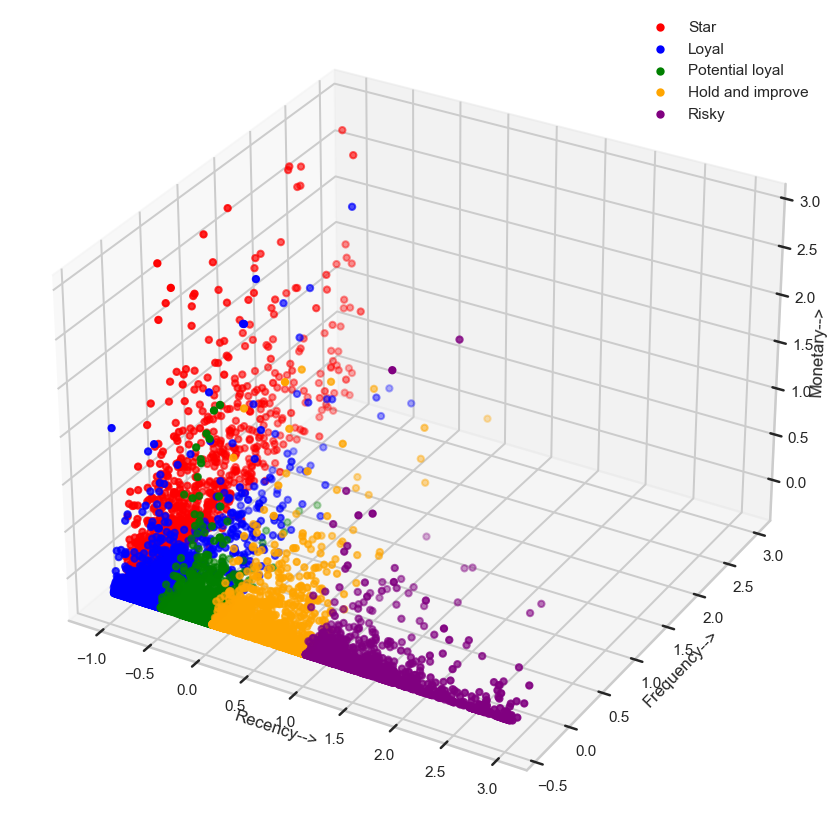

In [112]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['Re_zs'], x['Fe_zs'],x['Mo_zs'], s = 40 , color = 'red', label = "Star")
ax.scatter(y['Re_zs'], y['Fe_zs'],y['Mo_zs'], s = 40 , color = 'blue', label = "Loyal")
ax.scatter(z['Re_zs'], z['Fe_zs'],z['Mo_zs'], s = 40 , color = 'green', label = "Potential loyal")
ax.scatter(t['Re_zs'], t['Fe_zs'],t['Mo_zs'], s = 40 , color = 'orange', label = "Hold and improve")
ax.scatter(u['Re_zs'], u['Fe_zs'],u['Mo_zs'], s = 40 , color = 'purple', label = "Risky")
ax.set_xlabel('Recency-->')
ax.set_ylabel('Frequency-->')
ax.set_zlabel('Monetary-->')
ax.legend()
plt.show()